### Radial Velocity  

Example script fitting a power-law in period and M sin i to radial velocity data

First, let's import EPOS

In [1]:
import EPOS

Then intialize the EPOS class for use with a radial velocity survey using the RV keyword. We don't want to use the Monte Carlo simulation because of the small sample size (MC=False). And we want to fit the instrinsic mass distribution, so we need to convert to M sin i before fitting the observed planets (Msini=False).

In [2]:
epos= EPOS.epos(name='radial_velocity', RV=True, MC=False, Msini=True)


 |~| epos 3.0.0.dev4 |~|


Using random seed 322504493
Survey: None selected


Now we load the detected exoplanets and the survey completeness from the Mayor+ 2011 paper

In [3]:
obs, survey= EPOS.rv.Mayor2011()
epos.set_observation(**obs, Verbose=False)
epos.set_survey(**survey)

We are going to use a double broken power-law in mass and period to parametrize the intrinsic planet population. This function is pre-defined in the EPOS.fitfunctions module

In [4]:
epos.set_parametric(EPOS.fitfunctions.brokenpowerlaw2D)

Let's make an initial guess for each parameter. For the MCMC to run smoothly, we also define an upper and lower bound to some parameters with the min and max keywords.

The first parameter is a normalization parameter that defines the number of planets per star in the simulated range:

In [5]:
epos.fitpars.add('pps', 1.0, min=1e-3)

brokenpowerlaw2D uses 6 parameters, each indicated with the is2D keyword.

The first three parameters are the location of the break and the power-law indices before and after the break

In [6]:
epos.fitpars.add('P break', 1e3, min=100, max=7e3, is2D=True)
epos.fitpars.add('a_P', 1.0, min=0, max=3, is2D=True)
epos.fitpars.add('b_P', -0.5, min=-3, max=0, is2D=True)

The next three parameter define the planet mass distribution. We only use a single power-law in this example, so we fix the other two parameters.

In [7]:
epos.fitpars.add('M break', 10.0, fixed=True, is2D=True) 
epos.fitpars.add('a_M', 0.0, fixed=True, is2D=True)
epos.fitpars.add('b_M', -0.5, dx=0.1, is2D=True)

Next, let's define the range of planet parameters that is simulated (trim) and the range compared to observations (zoom)

Units are period (days) and planet mass (earth mass)

In [8]:
epos.set_ranges(xtrim=[1,1e5],ytrim=[1,1e5],xzoom=[10,1e4],yzoom=[50,1e4], Occ=True)

Now, let's run epos once to see what out initial distribution looks like and how it compares to observations


Preparing EPOS run...
  6 fit parameters

Starting the first noMC run
Finished one noMC in 0.007 sec


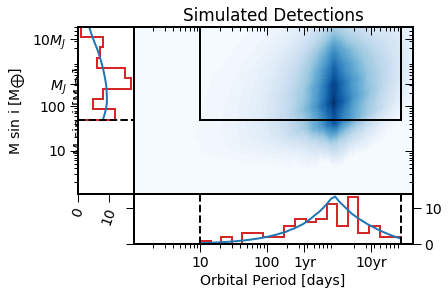

In [9]:
EPOS.run.once(epos)
EPOS.plot.periodradius.panels(epos, NB=True)

Blue is the simulated distribution, red the detected planets.

Now let's calculate the occurrence rates for comparison 


Interpolating planet occurrence

  x zoom bins
  x: [10,1e+04], y: [1,1.7], n=0, comp=nan, occ=0
  x: [10,1e+04], y: [1.7,2.6], n=1, comp=0.0027, occ=0.45
  x: [10,1e+04], y: [2.6,4.1], n=3, comp=0.024, occ=0.17
  x: [10,1e+04], y: [4.1,6.5], n=6, comp=0.079, occ=0.13
  x: [10,1e+04], y: [6.5,10], n=7, comp=0.16, occ=0.061
  x: [10,1e+04], y: [10,16], n=17, comp=0.19, occ=0.11
  x: [10,1e+04], y: [16,26], n=14, comp=0.2, occ=0.097
  x: [10,1e+04], y: [26,40], n=4, comp=0.23, occ=0.021
  x: [10,1e+04], y: [40,64], n=7, comp=0.34, occ=0.028
  x: [10,1e+04], y: [64,1e+02], n=9, comp=0.36, occ=0.034
  x: [10,1e+04], y: [1e+02,1.6e+02], n=4, comp=0.55, occ=0.009
  x: [10,1e+04], y: [1.6e+02,2.5e+02], n=8, comp=0.5, occ=0.02
  x: [10,1e+04], y: [2.5e+02,4e+02], n=14, comp=0.61, occ=0.029
  x: [10,1e+04], y: [4e+02,6.2e+02], n=13, comp=0.71, occ=0.022
  x: [10,1e+04], y: [6.2e+02,9.9e+02], n=10, comp=0.76, occ=0.017
  x: [10,1e+04], y: [9.9e+02,1.6e+03], n=6, comp=0.86, occ=0.0086
  x: [10,1

/Users/mulders/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mulders/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


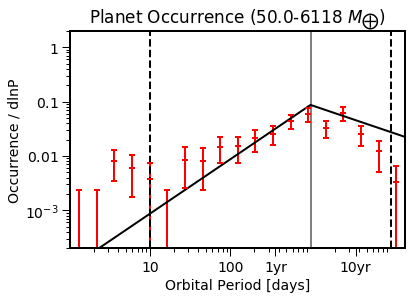

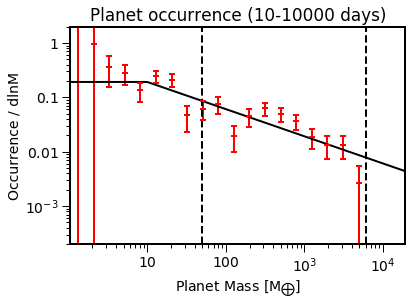

In [10]:
EPOS.occurrence.all(epos)
epos.plotpars['occrange']= [2e-4,2.]
EPOS.plot.parametric.oneD_x(epos, Occ=True, NB=True)
EPOS.plot.parametric.oneD_y(epos, Occ=True, NB=True)

The model population (black) looks reasonably close to the estimated occurrence rates (red).

Now let's run the MCMC chain to generate a planet population that better matches the data.

(This can take a long time, so the Saved keyword allows you to read in a previously saved run if it exists)


Loading saved status from chain/radial_velocity/100x1000x5.npz

NOTE: Random seed changed: 1885962102 to 322504493

MC-ing the 30 samples to plot

Best-fit values
  pps= 0.94 +0.237 -0.184
  P break= 1.99e+03 +1.12e+03 -1.11e+03
  a_P= 0.706 +0.324 -0.155
  b_P= -1.06 +0.786 -1.29
  b_M= -0.462 +0.0569 -0.0635

Starting the best-fit MC run
nobs=80 (x:88,y:73)

Goodness-of-fit
  logp= -0.8
  - p(n=80)=0.99
  - p(x)=0.88
  - p(y)=0.51

  Akaike/Bayesian Information Criterion
  - k=5, n=79
  - BIC= 23.5
  - AIC= 11.6, AICc= 9.5

Observation comparison in 0.001 sec


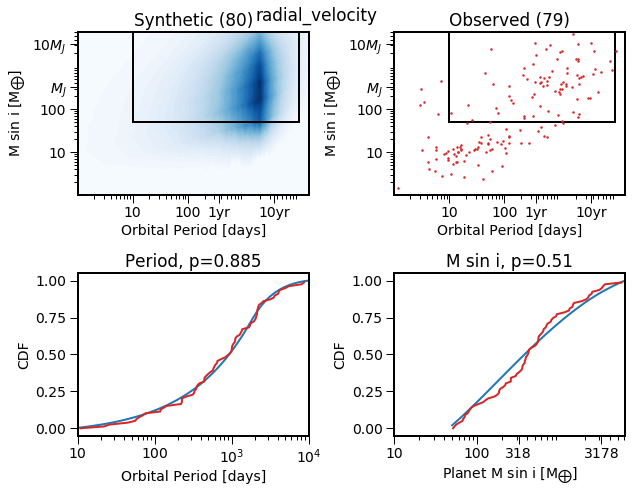

In [11]:
EPOS.run.mcmc(epos, nMC=1000, nwalkers=100, nburn=200, threads=20, Saved=True)
EPOS.plot.periodradius.cdf(epos, NB=True)

The MCMC has minimized the distance between the simulated orbital period and Msini distribution (blue) and the observed planets (red).

Now let's take a look at the posterior planet occurrence rate distributions, and compare them with the occurrence rates.

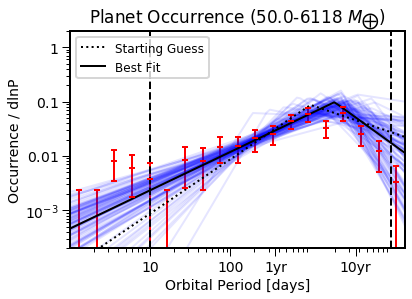

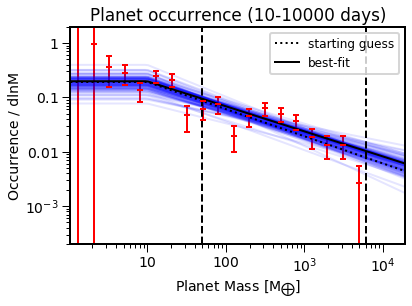

In [12]:
EPOS.plot.parametric.oneD_x(epos, MCMC=True, NB=True, Occ=True)
EPOS.plot.parametric.oneD_y(epos, MCMC=True, NB=True, Occ=True)

Now we have  distribution that describes the ocurrence in different regiosn of parameter space.
Let's see what the prediciton for directly imaged giant planets would be (1-10 au, 1-20 Mjup)

In [13]:
Pbin= [365.24 * au**1.5 for au in [10,100.]]
Mbin= [Mj * EPOS.cgs.Mjup/EPOS.cgs.Mearth for Mj in [1,20]]
epos.set_bins(xbins=[Pbin], ybins=[Mbin])
EPOS.occurrence.parametric(epos)


  posterior per bin
  x: [1.15e+04,3.65e+05], y: [3.2e+02,6.4e+03], area=10.35, eta_0=0.014
  gamma= 0.1% +0.2% -0.0%
  eta= 0.6% +2.2% -0.5%


That's about 1%, consistent with the upper limits for FGK stars